In [1]:
### Useful Variables ###

NUM_SEEDS = 1
NUM_ROLLOUTS = 100
NUM_AGENTS = 50
SAMPLE_MODE = "top"
NUM_WORKER = 10
NORMALIZE = "range"
# STACK = False

ENV_NAME = "BipedalWalker-v2"
RUN_NAME = "PPO"
DEFAULT_CONFIG = {}


YAML_PATH = "data/300-agents-ppo.yaml"

In [2]:
from gym.envs.box2d import BipedalWalker

from process_fft import get_fft_cluster_finder, get_fft_representation
from cluster_video import generate_video_of_cluster
from process_data import get_name_ckpt_mapping


env_maker = BipedalWalker

W0823 21:49:29.308178 140301504661248 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


Successfully loaded name_ckpt_mapping!
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=187 rew=282.21>
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=98 rew=282.24>
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=203 rew=282.25>
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=197 rew=282.48>
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=71 rew=282.55>
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=283 rew=282.79>
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=116 rew=283.13>
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=70 rew=283.20>
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=201 rew=283.28>
[1/50] (+0.0s/0.0s) Start collecting data from agent <PPO seed=113 rew=283.29>
[1/50] (+328.1s/328.1s) Got data from agent <PPO seed=187 rew=282.21>
[2/50] (+0.2s/328.3s) Got data from agent <PPO seed=98 rew=282.24>
[3/50] (+0.3s/328.6s) Got data from a

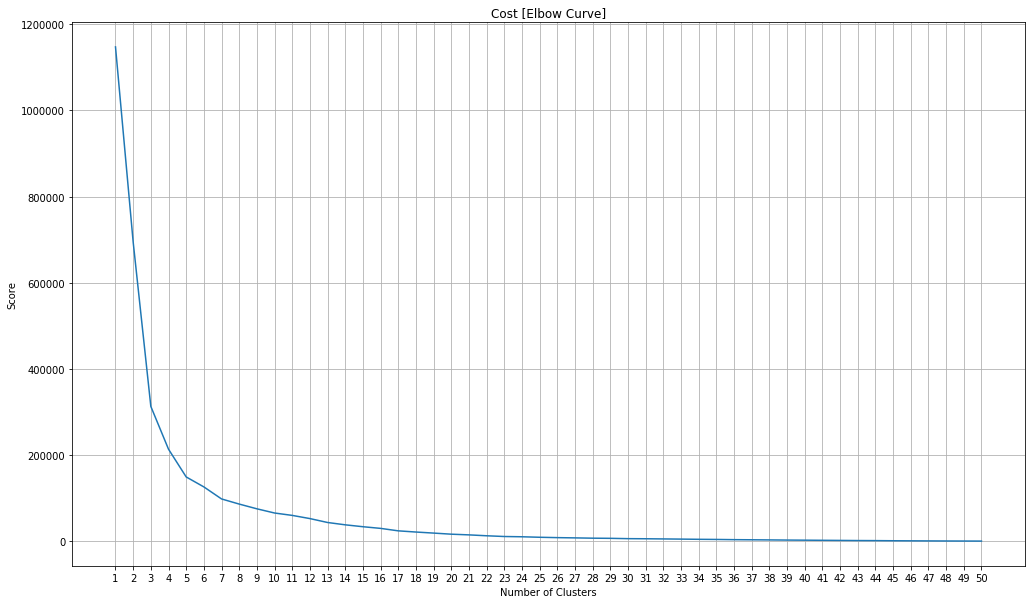

Successfully finish no-standardized clustering! Save at: data/300-agents-ppo_50agents_100rollout_1seed_15473631/300-agents-ppo_50agents_100rollout_1seed_15473631_nostd.png
Clustering Finished! Call ClusterFinder.display to see the elbow curve.


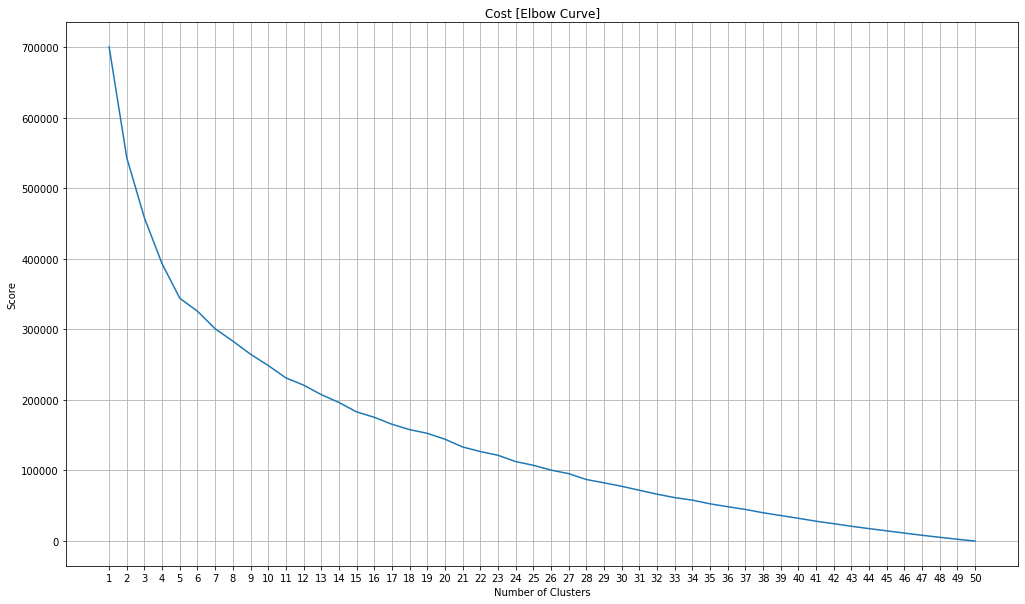

Successfully finish standardized clustering! Save at: data/300-agents-ppo_50agents_100rollout_1seed_15473631/300-agents-ppo_50agents_100rollout_1seed_15473631_std.png


In [4]:
ret = get_fft_cluster_finder(
    YAML_PATH,
    ENV_NAME,
    env_maker,
    RUN_NAME,
    NORMALIZE,
    NUM_AGENTS,
    NUM_SEEDS,
    NUM_ROLLOUTS,
    show=True
)

In [5]:
cluster_finder_dict = ret["cluster_finder"]
prefix = ret["prefix"]

In [9]:
best_k_dict = {
    "nostd_cluster_finder": 5,
    "std_cluster_finder": 5
}

In [10]:
prediction_dict = {}
for name, cluster_finder in cluster_finder_dict.items():
    best_k = best_k_dict[name]
    cluster_finder.set(best_k)
    prediction = cluster_finder.predict()
    prediction_dict[name] = prediction

In [12]:
from utils import initialize_ray as init

init()

for name, prediction in prediction_dict.items():
    generate_video_of_cluster(
        prediction,
        ENV_NAME,
        RUN_NAME,
        NUM_AGENTS,
        YAML_PATH,
        video_predix=prefix+name,
    )

Exception ignored in: <bound method ActorHandle.__del__ of Actor(CollectFramesWorker, d0e9d891d5b59aec2f6762fcc8d82d9fbaad14ed)>
Traceback (most recent call last):
  File "/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/actor.py", line 632, in __del__
    self.__ray_terminate__.remote()
  File "/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/actor.py", line 148, in remote
    return self._remote(args, kwargs)
  File "/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/actor.py", line 169, in _remote
    return invocation(args, kwargs)
  File "/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/actor.py", line 163, in invocation
    num_return_vals=num_return_vals)
  File "/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/actor.py", line 556, in _actor_method_call
    job_id=self._ray_actor_job_id,
  File "/home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/worker.py", line 740, in submit_task
    se

ArrowIOError: Broken pipe